In [32]:
import csv

with open("testpoints_labb2.txt", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        test_list = [
            (25, 32),
            (24.2, 31.5),
            (22, 34),
            (20.5, 34)
        ]

print(test_list)

[(25, 32), (24.2, 31.5), (22, 34), (20.5, 34)]


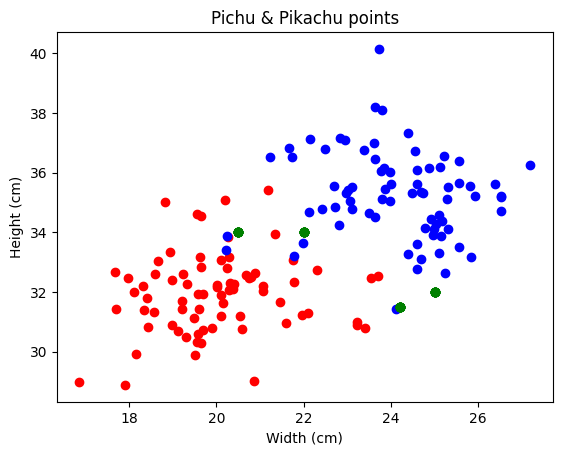

In [72]:
import matplotlib.pyplot as plt
import csv

# Create lists for "pichu" and "pikachu"
pichu_label = []
pikachu_label = []

# Categorize data into two lists (0-pichu, 1-pikachu)
with open("datapoints_labb2.txt", "r") as file:
    data = csv.reader(file, delimiter=",")
    next(data, None)
    for row in data:
        width, height, label = map(float, row)
        if label == 0:
            pichu_label.append((width, height))
        if label == 1:
            pikachu_label.append((width, height))

# Create plot for every point, classified with different color for each class
plt.scatter([x[0] for x in pichu_label],[y[1] for y in pichu_label], color = 'red')
plt.scatter([x[0] for x in pikachu_label],[y[1] for y in pikachu_label], color = 'blue')
plt.scatter([x[0] for x in test_list],[y[1] for y in test_list], color = 'green')

# Read testpoints file, skip header row and create "test_list"
with open("testpoints_labb2.txt", newline="") as csvfile:
    reader = csv.reader(csvfile)
    next(reader)
    for row in reader:
        test_list = [
            (25, 32),
            (24.2, 31.5),
            (22, 34),
            (20.5, 34)
        ]

# Define the numbers/sides meaning
plt.title("Pichu & Pikachu points")
plt.xlabel("Width (cm)")
plt.ylabel("Height (cm)")
plt.show()




In [47]:
import numpy as np

# Calculate distance between points
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2 - x1)**2 + (y2 - y1)**2)

# Combine all lists into one, calculate total number of data points
all_data = pichu_label + pikachu_label + test_list
num_points = len(all_data)

# Create 2d array
distances = np.zeros((num_points, num_points))

# Calculate and print distances between all pairs of datapoints 
for i in range(num_points):
    for j in range(num_points):
        distances[i][j] = euclidean_distance(all_data[i], all_data[j])


        print(f"The distance between point {i} and point {j} is: {distances[i][j]}")

The distance between point 0 and point 0 is: 0.0
The distance between point 0 and point 1 is: 4.250137627007489
The distance between point 0 and point 2 is: 2.815618601101218
The distance between point 0 and point 3 is: 4.218515376423372
The distance between point 0 and point 4 is: 4.051613301799872
The distance between point 0 and point 5 is: 3.6216737260472187
The distance between point 0 and point 6 is: 2.315642895966499
The distance between point 0 and point 7 is: 4.686814076731588
The distance between point 0 and point 8 is: 2.7646383667017354
The distance between point 0 and point 9 is: 1.9526311810860202
The distance between point 0 and point 10 is: 4.179696017405606
The distance between point 0 and point 11 is: 0.45730129534918973
The distance between point 0 and point 12 is: 3.761338508754545
The distance between point 0 and point 13 is: 2.7554074630362995
The distance between point 0 and point 14 is: 4.014481710939353
The distance between point 0 and point 15 is: 2.8896735509

In [60]:
# Finding closest label and classify thereafter

import numpy as np

test_list += [
    (25, 32), 
    (24.2, 31.5), 
    (22, 34), 
    (20.5, 34)]

# Calculate distance between pairs and store in 2d-array 
for i in range(num_points):
    for j in range(num_points):
        distances[i][j] = euclidean_distance(all_data[i], all_data[j])

closest_labels = []

# Classify each datapoint into either "pichu" or "pikachu" based on closest reference point
for i in range(num_points):
    closest_label = None
    min_distance = float('inf')
    for j in range(num_points):
        if i != j:
            distance = distances[i][j]
            if distance < min_distance:
                min_distance = distance
            if j < len(pichu_label):
                closest_label = "Pichu"
            elif j < len(pichu_label) + len(pikachu_label):
                closest_label = "Pikachu"
        closest_labels.append(closest_label)

# Print classification results
for i in range(len(pichu_label) + len(pikachu_label), num_points):
    print(f"Sample with (width, height): {test_list[i - num_points]} classified as {closest_labels[i - num_points]}")
    

    

Sample with (width, height): (25, 32) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22, 34) classified as Pikachu
Sample with (width, height): (20.5, 34) classified as Pikachu


# Uppgift 1

In [66]:
# Loop until user inputs valid "values"
while True:
    try:
        # Convert input to float
        width = float(input("Enter test point width: "))
        height = float(input("Enter the height: "))
        test_point = (width, height)
        break
    # Print "invalid value" if user enters something that cannot be converted, and prompt user until valid input is provided. 
    except ValueError:
        print("Invalid value")
        
    # initialize min_distance and closest_label    
    min_distance = float('inf')
    closest_label = None
    # Set the test point coordinates based on user input
    for i in range(num_points):
        test_point = (width, height)
        # Calculate distance between test point and reference point
        distance = euclidean_distance(test_point, all_data[i])
        # If distance is smaller than current min_distance, update with new smaller distance
        if distance < min_distance:
            min_distance = distance
            # Determine closest label based on index within reference point
            if i < len(pichu_label):
                closest_label = "Pichu"
            elif i < len(pichu_label) + len(pikachu_label):
                closest_label = "Pikachu"

print(f"Test point with (width, height): {test_point} is classified as {closest_label}")

Test point with (width, height): (24.0, 32.0) is classified as Pikachu


# Uppgift 2

In [71]:
import numpy as np
from operator import itemgetter

# Caclulate distance between points 
def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

# Create list for test points
test_points = [
    (25, 32), 
    (24.2, 31.5), 
    (22, 34), 
    (20.5, 34)]

# Calculate distance between set of test points and list of reference points
for test_point in test_points:
    distances = [(i, euclidean_distance(test_point, point)) for i, point in enumerate(all_data)]

# Generate list containing indicies of the top 10 closest points, sorted in acsending order
closest_indicies = [index for index, _ in sorted (distances, key=itemgetter(1))[:10]]

closest_points =[all_data[i] for i in closest_indicies]

# Print results, test points and closest reference points
print(f"Test point (width, height): {test_points} = closest points:")
for i, point in enumerate(closest_points, start=1):
    print(f"{i}, {point}")


Test point (width, height): (20.5, 34) = closest points:
1, (20.5, 34)
2, (20.276898330625336, 33.84658247356705)
3, (20.240420339246214, 33.87654102727224)
4, (20.216002852334192, 33.41610156154373)
5, (20.282109030336354, 33.18796105898338)
6, (21.35018601896744, 33.94708664610186)
7, (20.098954730848863, 33.067467402673685)
8, (19.639358214988224, 34.56117030001663)
9, (20.191281253428173, 35.06966921830237)
10, (19.55060327163345, 34.602756266320824)
